In [2]:
%%javascript
function clear_other_cells () {
document.getElementById('file_menu').parentNode.style.display = 'none';
document.getElementById('logout').style.display = 'none';
document.getElementById('notebook_name').style.display = 'none';
var this_cell = $(element).closest('.cell').data('cell');
Jupyter.notebook.get_cells().forEach(function (cell) {
if (cell.cell_type === 'code' && cell !== this_cell) {
cell.clear_output();
}
Jupyter.notebook.set_dirty(true);
});
};
$([IPython.events]).on('notebook_loaded.Notebook', clear_other_cells());
$(window).on("beforeunload", function(){
Jupyter.notebook.kernel.restart();
});
$([IPython.events]).on('notebook_loaded.Notebook', function() {
Jupyter.notebook.set_autosave_interval(0);
});


<IPython.core.display.Javascript object>

<ul style="list-style-type:circle;font-size:14px;line-height:27px;">
    <li><b>from streamanalytix.python.dataset import Dataset:</b> Load Dataset class from streamanalytix API.</li>
	<li><b>Dataset(source_name):</b> Creates object of dataset class for given source.
		<ul>
			<li><b>Dataset.get_dataframe():</b> Read data source and return a pandas dataframe. </li>
		</ul>
	</li>
	<li><b>from streamanalytix.utilities import sax_utils:</b> Load sax_util script. It has following functions
		<ul>
			<li><b>sax_utils.save_and_download_model(model_name, model_object):</b>This method lets the user to save and download the trained model with StreamAnalytix. This model can than be used for training and/or scoring purpose as part of the StreamAnalytix pipeline</li>
				<ul>
					<li><b>model_name:</b> Name of the model. Accepted String value only. e.g. <i>"DecisionTreeModel"</i></li>
					<li><b>model_object:</b> Object of the trained model</li>
				</ul>
			<li><b>sax_utils.get_h2o_cluster_url(cluster_name):</b>This method lets the user to get h2o cluster url by providing cluster name</li>
				<ul>
					<li><b>cluster_name:</b> Name of the cluster. Accepted String value only. e.g. <i>"TrainingCluster"</i></li>
				</ul>
			<li><b>sax_utils.upload_and_register_h2o_model(model_object, model_name, model_type, project_name, project_version):</b>This method lets the user to upload and register h2o model in 'mojo' format in streamanalytix</li>
				<ul>
					<li><b>model_object:</b> Object of trained H2O model</li>
					<li><b>model_name:</b>Name of the model. Accepted String value only. e.g. <i>"H2OTreeModel"</i>
					<li><b>model_type:</b>Type of trained model. Accepted String value only. We support H2O model of types :<i>"DistributedRandomForest"</i>,<i>"GeneralizedLinearModelling"</i>,<i>"IsolationForest"</i>,<i>"GradientBoostingMachine"</i></li>
					<li><b>project_name:</b>Project Name in which model should register. Accepted String value only. e.g. <i>"MyProject"</i></li>
					<li><b>project_version:</b>Version of given project in which model should register</li>
				</ul>
		</ul>
	</li>
</ul>


In [3]:
from streamanalytix.python.dataset import Dataset
from streamanalytix.utilities import sax_utils


dataset_1 = Dataset("creditcard-fraud-data")

# you can use pandas to create dataframe as shown below
df = dataset_1.get_dataframe()

/data/data1/DSc_build/python/packages/matplotlib/subprocess32.py:149: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


Dataframe created


In [4]:
print(df.head(5))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [5]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
sns.set_style("dark")

from sklearn import preprocessing
from scipy.stats import skew, boxcox

import warnings
warnings.filterwarnings("ignore")
# Utilities-related f

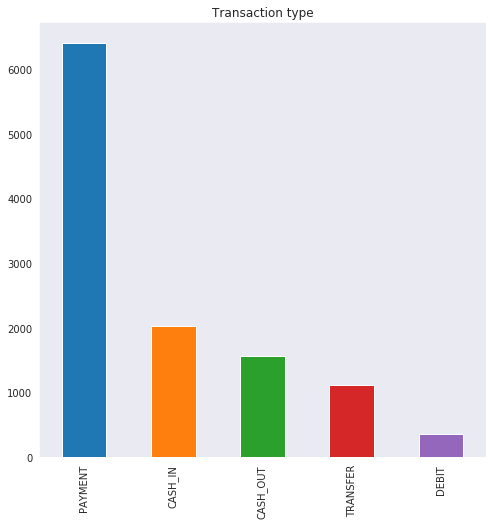

In [6]:
# Transaction Type
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

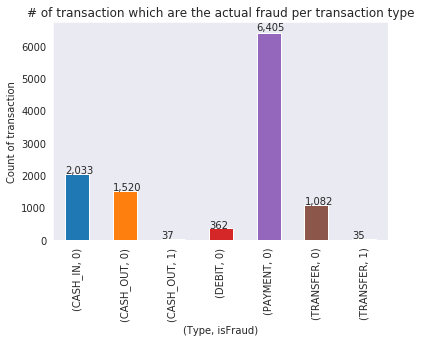

In [7]:
# Fraud transaction par transaction type
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [10]:
from sklearn.model_selection import train_test_split
y = df['isFraud']
X = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #use this random state to match my results only

In [9]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
logitic = linear_model.LogisticRegression()
model = logitic.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3421
           1       0.21      0.95      0.34        22

   micro avg       0.98      0.98      0.98      3443
   macro avg       0.60      0.97      0.66      3443
weighted avg       0.99      0.98      0.98      3443

[[3341   80]
 [   1   21]]


0.9764740052279989

In [ ]:
sax_utils.save_and_download_model('mobileMoneyFraudDetectionScikit', model)